--------------------------------------------------------------------------------------------------------------

# <p style = "text-align:center; "><font color= blue >Water Quality Prediction</font></p>

--------------------------------------------------------------------------------------------------------------

We all know water is one of the most essential resource for our living. But as the development is increasing, we are exploiting water by wasting it and treating it with harmful materials which makes water impure and unfit for use. This is the reason it is very important to know the quality of water. This kernel is based on water quality prediction. In this kernel, water quality index (WQI) and quality status of water is predicted through some parameters that affects water quality.
In this notebook I have performed Data Cleaning steps and did Exploratory Data Analysis. Then I have did some calculations as the data does not contain the column which can be used for prediction i.e <b>WQI</b>


-----

## About Dataset

### Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

'final.csv' file contains water quality metrics of 3276 records.

###### 1. pH 
level is a measure of the acid content of the water. Most
forms of aquatic life tend to be very sensitive to pH. 

###### 2. TDS (Total Dissolved Solids)
This is a measure of the solid materials dissolved in the river
water. This includes salts, some organic materials, and a wide
range of other things from nutrients to toxic materials. 

###### 3. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. T

###### 4. Temperature
The water temperature of a river is very important, as many of
the physical, biological, and chemical characteristics of a river
are directly affected by temperature. Most waterborne animal and
plant life survives within a certain range of water temperatures,
and few of them can tolerate extreme changes in this parameter. 

# **Table of Contents**
* [Importing Libraries](#2)
* [Data gathering](#3)
* [Data Cleaning](#4)
* [EDA](#5)
* [Feature Engineering](#6)
* [Model Creation](#7)

----

<a id=2></a>
# **Importing libraries**

-----

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

/home/karuna/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


----
<a id=3></a>
## Data Gathering

----

In [2]:
dataset = pd.read_csv('/home/karuna/Projects/Water-Quality-Prediction/Data/final.csv')
dataset.head()

,ph,TDS,Turbidity,Temperature
0,NaN,20791.31898,2.963135,29.3
1,3.716080,18630.05786,4.500656,24.0
2,8.099124,19909.54173,3.055934,24.0
3,8.316766,22018.41744,4.628771,25.5
4,9.092223,17978.98634,4.075075,26.0


In [3]:
dataset.shape

(3276, 4)

In [4]:
dataset.isnull().sum()

ph             491
TDS              0
Turbidity        0
Temperature    111
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           2785 non-null   float64
 1   TDS          3276 non-null   float64
 2   Turbidity    3276 non-null   float64
 3   Temperature  3165 non-null   float64
dtypes: float64(4)
memory usage: 102.5 KB


In [6]:
dataset.describe()

,ph,TDS,Turbidity,Temperature
count,2785.000000,3276.000000,3276.000000,3165.000000
mean,7.080795,22014.092526,3.966786,25.231523
std,1.594320,8768.570828,0.780382,2.601129
min,0.000000,320.942611,1.450000,15.000000
25%,6.093092,15666.690300,3.439711,24.000000
50%,7.036752,20927.833605,3.955028,25.500000
75%,8.062066,27332.762125,4.500320,27.000000
max,14.000000,61227.196010,6.739000,36.000000


----

<a id=4></a>
# **Data Cleaning**

----

-----

### Below code is to fill null and empty values in csv file by mean value of all parameters respectively..

----

In [7]:
dataset.fillna(dataset.mean(), inplace=True)
dataset.isnull().sum()

ph             0
TDS            0
Turbidity      0
Temperature    0
dtype: int64

In [8]:
dataset

,ph,TDS,Turbidity,Temperature
0,7.080795,20791.31898,2.963135,29.3
1,3.716080,18630.05786,4.500656,24.0
2,8.099124,19909.54173,3.055934,24.0
3,8.316766,22018.41744,4.628771,25.5
4,9.092223,17978.98634,4.075075,26.0
...,...,...,...,...
3271,4.668102,47580.99160,4.435821,28.0
3272,7.808856,17329.80216,2.798243,23.0
3273,9.419510,33155.57822,3.298875,28.0
3274,5.126763,11983.86938,4.708658,31.0


In [9]:
dataset.dtypes

ph             float64
TDS            float64
Turbidity      float64
Temperature    float64
dtype: object

----

<a id=5></a>
# **EDA**

----

### Below is Correlation heatmap ranging from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.



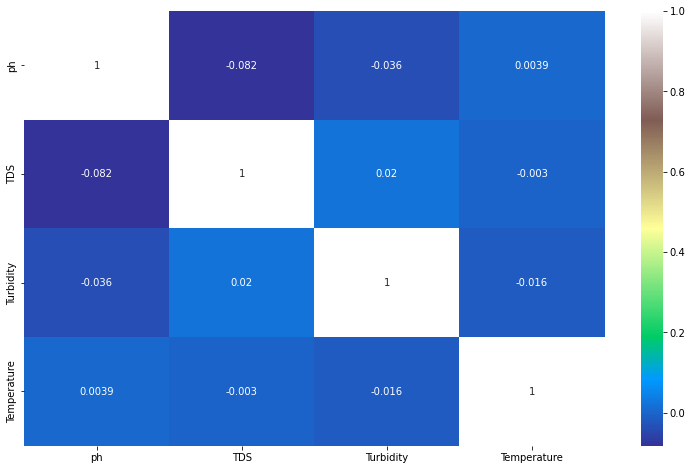

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(dataset.corr(),annot=True,cmap='terrain')
plt.show()

----
### Let's visualize our data.
----


### Visualizing pH


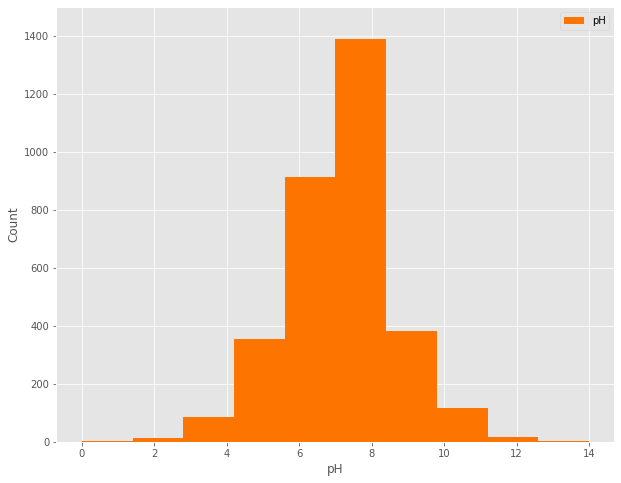

In [11]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("pH")
ax.set_ylabel("Count")
ax.set_ylim((0, 1500))
ax.hist(dataset.ph, label = "pH", bins = 10, color="#fe7401")
ax.legend()
plt.show()


### Visualizing TDS (Total Dissolved Solids)


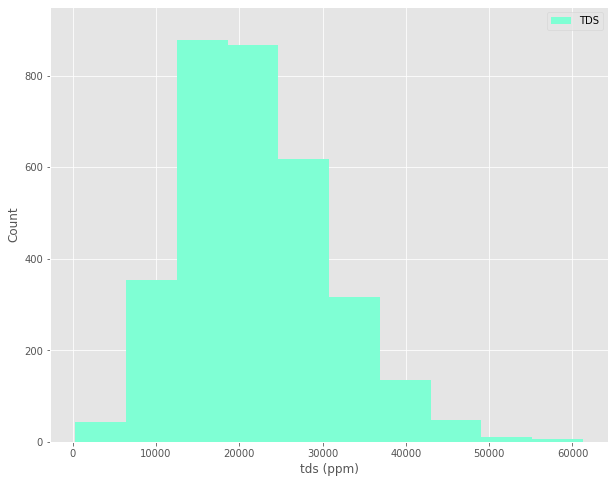

In [12]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("tds (ppm)")
ax.set_ylabel("Count")
ax.set_ylim((0, 950))
ax.hist(dataset.TDS, label = "TDS", bins = 10, color="#7FFFD4")
ax.legend()
plt.show()


### Visualizing Turbidity


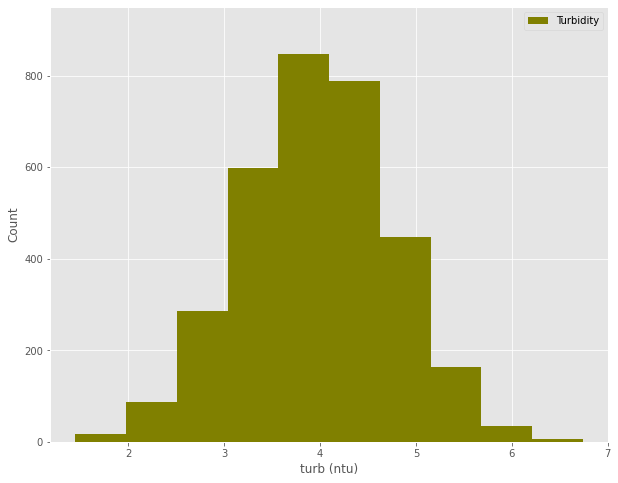

In [13]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("turb (ntu)")
ax.set_ylabel("Count")
ax.set_ylim((0, 950))
ax.hist(dataset.Turbidity, label = "Turbidity", bins = 10, color="#808000")
ax.legend()
plt.show()


### Visualizing Temperature


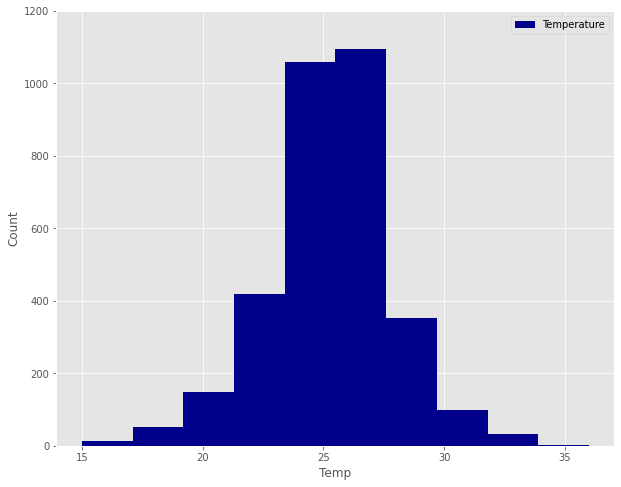

In [14]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("Temp")
ax.set_ylabel("Count")
ax.set_ylim((0, 1200))
ax.hist(dataset.Temperature, label = "Temperature", bins = 10, color="#00008B")
ax.legend()
plt.show()

----

<a id=6></a>
# **Feature Engineering**

### > Box-Plot
* box or whiskers plot is a method used for depicting groups of numerical data through their quartiles graphically. These may also have some lines extending from the boxes or whiskers which indicates the variability outside the lower and upper quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers can be indicated as individual points.

* It helps to find out how much the data values vary or spread out with the help of graphs. As we need more information than just knowing the measures of central tendency, this is where the box plot helps. 

* The five-number summary in the box plot is minimum, maximum, median, first quartile, and third quartile.

![alt text](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)

> An <mark>outlier</mark> is a value that lies in both extremes of data.
>> Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers.
----

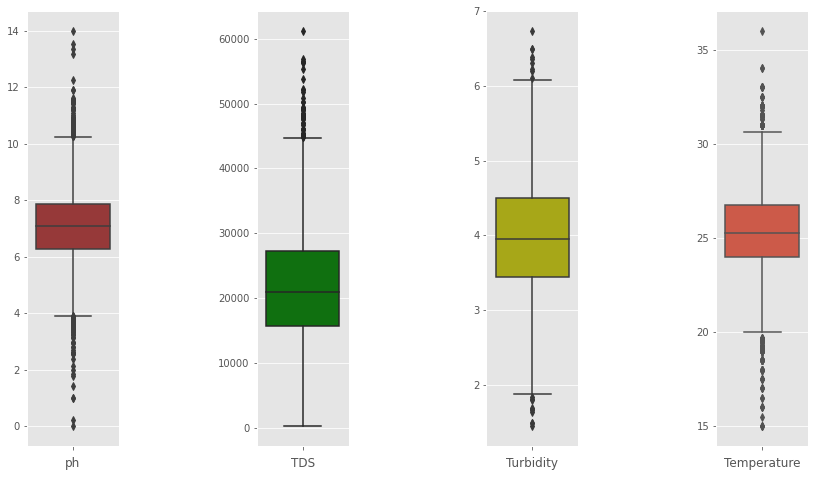

In [15]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(14, 8))

# add padding between the subplots
plt.subplots_adjust(wspace=1.5) 

# draw boxplot for age in the 1st subplot
sns.boxplot(data=dataset['ph'], ax=ax[0], color='brown',)
ax[0].set_xlabel('ph')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=dataset['TDS'], ax=ax[1], color='g')
ax[1].set_xlabel('TDS')

# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=dataset['Turbidity'], ax=ax[2], color='y')
ax[2].set_xlabel('Turbidity')

# finally draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=dataset['Temperature'], ax=ax[3])
ax[3].set_xlabel('Temperature')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

In [16]:
# To filter outliers:

# Q1 = dataset['Temperature'].quantile(0.25)
# Q3 = dataset['Temperature'].quantile(0.75)
# IQR = Q3 - Q1    #IQR is interquartile range.
# print(Q1, " ", Q3, " ", IQR)


# filter = (dataset['Temperature'] >= Q1 - 1.5 * IQR) & (dataset['Temperature'] <= Q3 + 1.5 *IQR)
# dataset = dataset.loc[filter] 

### The Water Quality Index is calculated by aggregating the quality rating with the weight linearly, 
#### WQI = ∑ (qn x Wn)
#### where qn =Quality rating for the nth Water quality parameter, Wn= unit weight for the nth parameters.       

<br>The equation can be given as:
<br>$$WQI_{MP} = \sum_{i=1} W_Y Q_Y$$
<br>Here,
>>$$Y = available parameters$$
>>$$Q_Y = q- values of available parameters$$
>>$$W_Y = weighting factors of available parameters$$



<table style = "border: 1px solid black;
  border-collapse: collapse;background-color: #D6EEEE;width:50%">
  <tr>
    <th>WQI value</th>
    <th>Water quality</th>
  </tr>
  <tr>
    <td> less than 50 </td>
    <td> excellent </td>  
  </tr>
  <tr>
    <td> 50-100</td>
    <td> good water </td> 
  </tr>
    <tr>
    <td> 100-200 </td>
    <td> poor water </td> 
  </tr>
    <tr>
    <td> 200-300</td>
    <td>  very poor water </td> 
  </tr>
    <tr>
    <td> >300 </td>
    <td> Water unsuitable
for drinking </td> 
  </tr>
</table>
<p style = "text-align: center;">  Water quality classification based on WQI value </p>


<table style = "border: 1px solid black;
  border-collapse: collapse;background-color: #D6EEEE;width:50%">
  <tr>
    <th>Water quality</th>
    <th>BIS(Bureau of Indian Standard) for Water, $$S_n$$</th> 
  </tr>
  <tr>
    <td> pH </td>
    <td> 8.5 </td>  
  </tr>
  <tr>
    <td> TDS </td>
    <td> 500 </td> 
  </tr>
    <tr>
    <td> Turbidity </td>
    <td> 5 </td> 
  </tr>
    <tr>
    <td> Temperature </td>
    <td> 35 </td> 
  </tr>
    
</table>
<p style = "text-align: center;">  Water Quality Standards </p>

#### PARTS OF WATER QUALITY INDEX
There are two parts of water quality index.
 1. Q- value
 2. Weighting factor

> Q- value
>> It is the indication of water quality relative to 100 of one parameter. The Q-Value is an indication of how good (or bad) the water quality is relative to one parameter.<br>
    
> Weighting Factor
>> It sets the relative importance of the parameter to over all
water quality.
 
#### REFERENCES:
[1]. National sanitation foundation <br>
[2]. www.water-WATER <br>
[3]. "QUALITY INDEX WITH MISSING PARAMETERS",Garima Srivastava, Dr. Pradeep Kumar, M.Tech(Environmental Science & Engg.), Associate Professor, Civil Engg. Department, HBTI Kanpur, India.net <br>
[4]. www.waterontheweb.org <br>
[5] https://www.researchgate.net/publication/337881191_Various_methods_for_calculating_the_water_quality_index



#### Applying <mark> Weighted Arithmetic Index </mark> method for calculating wqi

In [17]:
#Summation of 1/Sn where Sn is BIS std.

sum_Sn = (1/8.5) + (1/500) + (1/5) + (1/35)
print("\nsum_Sn = ", sum_Sn)

#Calculating k value

k = 1/sum_Sn
print("K = ", k, "\n")

#Calculating Weight for parameters, Wi = k/Sn

wt_ph = k/8.5; 
print("Weight factor for pH = ", wt_ph)
wt_tds = k/500;
print("Weight factor for tds = ", wt_tds)
wt_turb = k/5;
print("Weight factor for turbidity = ", wt_turb)
wt_temp = k/35;
print("Weight factor for temperature =  ", wt_temp)

#Summation of all weight factor will give us value one

print('''
Summarizing Ideal values for all parameters, Vo:
pH: 6.5
TDS: 0
Turbidity: 0
Temperature: 20
''')


sum_Sn =  0.348218487394958
K =  2.8717602200878423 

Weight factor for pH =  0.33785414353974613
Weight factor for tds =  0.005743520440175684
Weight factor for turbidity =  0.5743520440175685
Weight factor for temperature =   0.08205029200250978

Summarizing Ideal values for all parameters, Vo:
pH: 6.5
TDS: 0
Turbidity: 0
Temperature: 20



In [18]:
'''
Calcuating Vn/Sn, 
where Vn is measured values for respective parameter
Representing Vn/Sn by ratio
Since Ideal value for pH and Temp isn't equal to zero, we use different formula.
'''

dataset['pH_ratio'] = abs((dataset.ph-6.5)/(8.5-6.5))
# dataset['pH_ratio'] = dataset['ph'].map(lambda t: ((t-7)/(8.5-7)) if ((t-7)/(8.5-7) > 0) else 0)

    
dataset['tds_ratio'] = dataset.TDS/500
dataset['turb_ratio'] = dataset.Turbidity/5

dataset['temp_ratio'] = abs((dataset.Temperature - 20)/(35-20))
# dataset['temp_ratio'] = dataset['temp'].map(lambda t: ((t-20)/(35-20)) if ((t-20)/(35-25) > 0) else 0)

In [19]:
dataset

,ph,TDS,Turbidity,Temperature,pH_ratio,tds_ratio,turb_ratio,temp_ratio
0,7.080795,20791.31898,2.963135,29.3,0.290397,41.582638,0.592627,0.620000
1,3.716080,18630.05786,4.500656,24.0,1.391960,37.260116,0.900131,0.266667
2,8.099124,19909.54173,3.055934,24.0,0.799562,39.819083,0.611187,0.266667
3,8.316766,22018.41744,4.628771,25.5,0.908383,44.036835,0.925754,0.366667
4,9.092223,17978.98634,4.075075,26.0,1.296112,35.957973,0.815015,0.400000
...,...,...,...,...,...,...,...,...
3271,4.668102,47580.99160,4.435821,28.0,0.915949,95.161983,0.887164,0.533333
3272,7.808856,17329.80216,2.798243,23.0,0.654428,34.659604,0.559649,0.200000
3273,9.419510,33155.57822,3.298875,28.0,1.459755,66.311156,0.659775,0.533333
3274,5.126763,11983.86938,4.708658,31.0,0.686619,23.967739,0.941732,0.733333


In [20]:
dataset.shape

(3276, 8)

In [21]:
dataset['Qn_ph'] = dataset.pH_ratio * 100
dataset['Qn_tds'] = dataset.tds_ratio * 100
dataset['Qn_turb'] = dataset.turb_ratio * 100
dataset['Qn_temp'] = dataset.temp_ratio * 100

dataset.head()
dataset.dtypes


ph             float64
TDS            float64
Turbidity      float64
Temperature    float64
pH_ratio       float64
tds_ratio      float64
turb_ratio     float64
temp_ratio     float64
Qn_ph          float64
Qn_tds         float64
Qn_turb        float64
Qn_temp        float64
dtype: object

In [22]:
dataset['wph']=dataset.Qn_ph * wt_ph
dataset['wtds']=dataset.Qn_tds * wt_tds
dataset['wturb']=dataset.Qn_turb * wt_turb
dataset['wtemp']=dataset.Qn_temp * wt_temp

dataset['wqi']=(dataset.wph+dataset.wtds+dataset.wturb+dataset.wtemp)/(wt_ph + wt_tds + wt_turb + wt_temp)
dataset

# dataset.drop(['pH_ratio', 'tds_ratio', 'turb_ratio', 'temp_ratio'], axis=1)

,ph,TDS,Turbidity,Temperature,pH_ratio,tds_ratio,turb_ratio,temp_ratio,Qn_ph,Qn_tds,Qn_turb,Qn_temp,wph,wtds,wturb,wtemp,wqi
0,7.080795,20791.31898,2.963135,29.3,0.290397,41.582638,0.592627,0.620000,29.039725,4158.263796,59.262708,62.000000,9.811191,23.883073,34.037657,5.087118,72.819040
1,3.716080,18630.05786,4.500656,24.0,1.391960,37.260116,0.900131,0.266667,139.195996,3726.011572,90.013126,26.666667,47.027944,21.400424,51.699223,2.188008,122.315598
2,8.099124,19909.54173,3.055934,24.0,0.799562,39.819083,0.611187,0.266667,79.956209,3981.908346,61.118675,26.666667,27.013537,22.870172,35.103636,2.188008,87.175352
3,8.316766,22018.41744,4.628771,25.5,0.908383,44.036835,0.925754,0.366667,90.838294,4403.683488,92.575411,36.666667,30.690094,25.292646,53.170876,3.008511,112.162127
4,9.092223,17978.98634,4.075075,26.0,1.296112,35.957973,0.815015,0.400000,129.611173,3595.797268,81.501508,40.000000,43.789672,20.652535,46.810558,3.282012,114.534777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,47580.99160,4.435821,28.0,0.915949,95.161983,0.887164,0.533333,91.594916,9516.198320,88.716418,53.333333,30.945722,54.656480,50.954456,4.376016,140.932673
3272,7.808856,17329.80216,2.798243,23.0,0.654428,34.659604,0.559649,0.200000,65.442801,3465.960432,55.964857,20.000000,22.110121,19.906815,32.143530,1.641006,75.801472
3273,9.419510,33155.57822,3.298875,28.0,1.459755,66.311156,0.659775,0.533333,145.975516,6631.115644,65.977510,53.333333,49.318433,38.085948,37.894318,4.376016,129.674714
3274,5.126763,11983.86938,4.708658,31.0,0.686619,23.967739,0.941732,0.733333,68.661854,2396.773876,94.173169,73.333333,23.197692,13.765920,54.088552,6.017021,97.069185


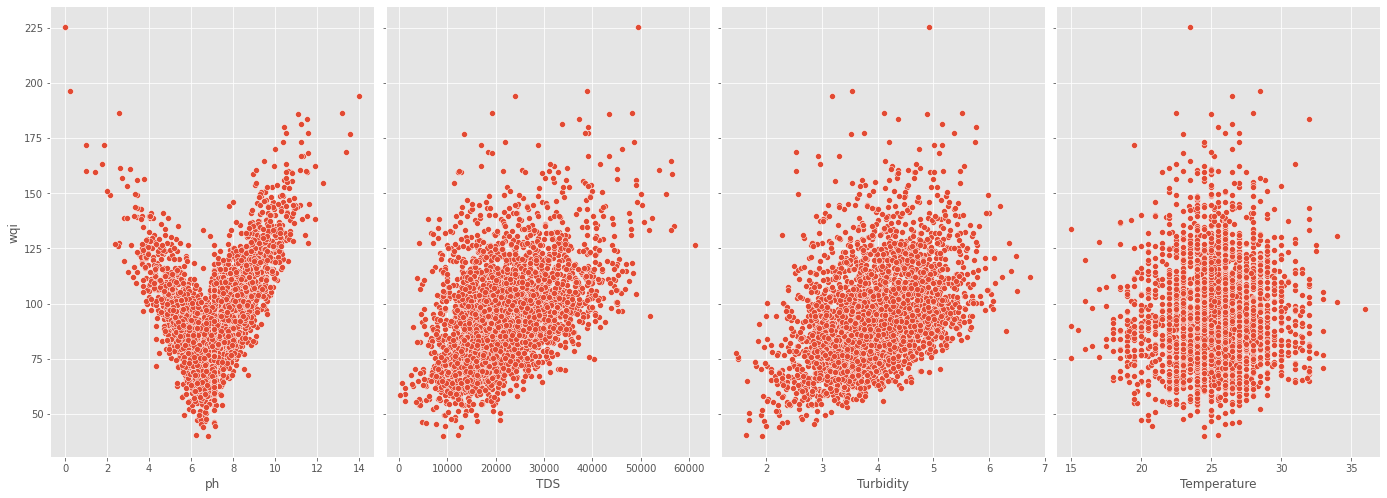

In [23]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['ph','TDS','Turbidity', 'Temperature'], y_vars='wqi', size=7, aspect=0.7)

In [24]:
max(dataset['wqi'])

225.14587360030248

In [25]:
min(dataset['wqi'])

39.88124361088856


#### Then we classify the water on the basis of their water quality index.


In [26]:
dataset['quality']=dataset.wqi.apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable')))))
dataset

,ph,TDS,Turbidity,Temperature,pH_ratio,tds_ratio,turb_ratio,temp_ratio,Qn_ph,Qn_tds,Qn_turb,Qn_temp,wph,wtds,wturb,wtemp,wqi,quality
0,7.080795,20791.31898,2.963135,29.3,0.290397,41.582638,0.592627,0.620000,29.039725,4158.263796,59.262708,62.000000,9.811191,23.883073,34.037657,5.087118,72.819040,Poor
1,3.716080,18630.05786,4.500656,24.0,1.391960,37.260116,0.900131,0.266667,139.195996,3726.011572,90.013126,26.666667,47.027944,21.400424,51.699223,2.188008,122.315598,Unsuitable
2,8.099124,19909.54173,3.055934,24.0,0.799562,39.819083,0.611187,0.266667,79.956209,3981.908346,61.118675,26.666667,27.013537,22.870172,35.103636,2.188008,87.175352,Very Poor
3,8.316766,22018.41744,4.628771,25.5,0.908383,44.036835,0.925754,0.366667,90.838294,4403.683488,92.575411,36.666667,30.690094,25.292646,53.170876,3.008511,112.162127,Unsuitable
4,9.092223,17978.98634,4.075075,26.0,1.296112,35.957973,0.815015,0.400000,129.611173,3595.797268,81.501508,40.000000,43.789672,20.652535,46.810558,3.282012,114.534777,Unsuitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,47580.99160,4.435821,28.0,0.915949,95.161983,0.887164,0.533333,91.594916,9516.198320,88.716418,53.333333,30.945722,54.656480,50.954456,4.376016,140.932673,Unsuitable
3272,7.808856,17329.80216,2.798243,23.0,0.654428,34.659604,0.559649,0.200000,65.442801,3465.960432,55.964857,20.000000,22.110121,19.906815,32.143530,1.641006,75.801472,Unsuitable
3273,9.419510,33155.57822,3.298875,28.0,1.459755,66.311156,0.659775,0.533333,145.975516,6631.115644,65.977510,53.333333,49.318433,38.085948,37.894318,4.376016,129.674714,Unsuitable
3274,5.126763,11983.86938,4.708658,31.0,0.686619,23.967739,0.941732,0.733333,68.661854,2396.773876,94.173169,73.333333,23.197692,13.765920,54.088552,6.017021,97.069185,Very Poor


In [27]:
dataset.describe()

,ph,TDS,Turbidity,Temperature,pH_ratio,tds_ratio,turb_ratio,temp_ratio,Qn_ph,Qn_tds,Qn_turb,Qn_temp,wph,wtds,wturb,wtemp,wqi
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,22014.092526,3.966786,25.231523,0.605018,44.028185,0.793357,0.354474,60.501750,4402.818505,79.335723,35.447434,20.440767,25.287678,45.566635,2.908472,94.203552
std,1.469956,8768.570828,0.780382,2.556669,0.508322,17.537142,0.156076,0.158232,50.832175,1753.714166,15.607648,15.823186,17.173861,10.072493,8.964285,1.298297,21.806012
min,0.000000,320.942611,1.450000,15.000000,0.000466,0.641885,0.290000,0.000000,0.046600,64.188522,29.000000,0.000000,0.015744,0.368668,16.656209,0.000000,39.881244
25%,6.277673,15666.690300,3.439711,24.000000,0.290397,31.333381,0.687942,0.266667,29.039725,3133.338060,68.794217,26.666667,9.811191,17.996391,39.512099,2.188008,79.273505
50%,7.080795,20927.833605,3.955028,25.231523,0.434031,41.855667,0.791006,0.348768,43.403115,4185.566721,79.100551,34.876819,14.663922,24.039888,45.431563,2.861653,91.482951
75%,7.870050,27332.762125,4.500320,26.750000,0.843858,54.665524,0.900064,0.450000,84.385832,5466.552425,90.006396,45.000000,28.510103,31.397256,51.695357,3.692263,106.133345
max,14.000000,61227.196010,6.739000,36.000000,3.750000,122.454392,1.347800,1.066667,375.000000,12245.439202,134.780000,106.666667,126.695304,70.331930,77.411168,8.752031,225.145874


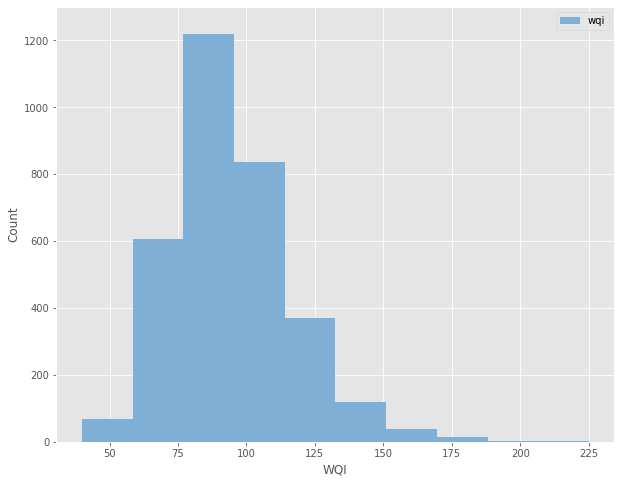

In [28]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("WQI")
ax.set_ylabel("Count")
ax.set_ylim((0, 1300))
ax.hist(dataset.wqi, label = "wqi", bins = 10, color="#7FAFD4")
ax.legend()
plt.show()

<AxesSubplot:>

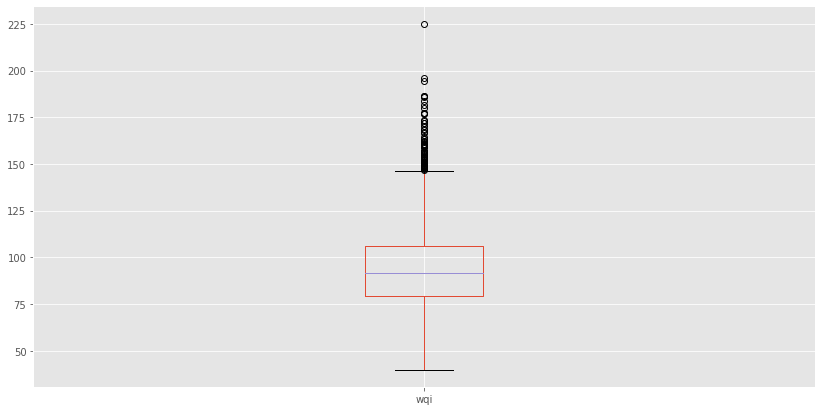

In [29]:
dataset.boxplot(column = ['wqi'], figsize=(14,7))

----

<a id=7></a>
# **Model Creation**

----


## <mark><em>1. Multiple Linear Regression</em></mark>


* Is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an important regression algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable. It uses two or more independent variables to predict a dependent variable by fitting a best linear relationship.

* Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. You can use multiple linear regression when you want to know:

* How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
* The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).


In [30]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature', 'pH_ratio', 'tds_ratio', 'turb_ratio', 'Qn_ph', 'Qn_tds', 'Qn_turb']]
y = dataset['wqi']


In [31]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100, shuffle='true')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle='true')
# summarize the shape of the train and test sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(2293, 10) (983, 10) (2293,) (983,)


In [32]:

#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

In [33]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -9.561112560923661
Coefficients:


[('ph', 0.008425272217412898),
 ('TDS', 0.0011034017577576903),
 ('Turbidity', 0.02869097735471949),
 ('Temperature', 0.4904894573389781),
 ('pH_ratio', 0.003375619547444356),
 ('tds_ratio', 2.206803515445719e-06),
 ('turb_ratio', 0.005738195470943905),
 ('Qn_ph', 0.33756195474442785),
 ('Qn_tds', 0.0002206803515577458),
 ('Qn_turb', 0.5738195470943898)]

In [34]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))


Prediction for test set: [ 92.38490962  97.96644311  77.86914872  67.57494424  84.76174357
 186.29452393 103.60077602 181.4437608   62.75723117  99.5339144
  80.75011792  97.62524137  58.56054785  72.68923503 129.05867973
 129.08394314  73.90739177 105.32352314  74.89287535  87.16575294
  81.59544789  97.26614592  94.11089069 110.63741174  73.42844704
  96.7106082   98.72491715 130.66354959 103.48342332  74.86719324
 121.85275393  66.49726514  89.69249599 111.81494281  94.11428113
  76.2872315   78.18451438 100.26098493  76.27230858  90.67814908
  78.22578618 129.25940755 110.17018289  87.80379521  81.83182335
  82.67753717  98.52813775  71.96004555  76.90549752  98.13961778
  87.11463963 125.96664377  64.8587336   91.53528322 100.70359965
 171.66319714 108.95825179  72.04776072  78.16400466  94.29355984
 143.57665002  80.725756    85.41744331  69.96598366  90.34544891
  88.84075425 104.9251481   93.77734863 103.85411231 101.70028373
  49.69556563 103.97172604 114.43805702 106.12963841

In [35]:
'''
Once we have fitted (trained) the model, 
we can make predictions using the predict() function. 
We pass the values of x_test to this method and compare the predicted values called y_pred_mlr with y_test values to check how accurate our predicted values are.
'''
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(10)


,Actual value,Predicted value
2947,92.309731,92.384910
2782,98.193551,97.966443
1644,78.588540,77.869149
70,67.631606,67.574944
2045,84.517055,84.761744
263,186.416743,186.294524
1042,103.589984,103.600776
2263,181.469417,181.443761
450,62.635550,62.757231
1832,99.499222,99.533914


In [36]:
res = mlr.predict([[3.716080, 18630.05786, 4.500656, 24.0, 1.391960, 37.260116, 0.900131, 139.195996, 3726.011572, 90.013126]])[0]
res

122.39827753063504

### R-Squared (R² or the coefficient of determination) 
* Is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

### Absolute Error
* Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value. For example, if a scale states 90 pounds but you know your true weight is 89 pounds, then the scale has an absolute error of 90 lbs – 89 lbs = 1 lbs.

### Mean Absolute Error
* The Mean Absolute Error(MAE) is the average of all absolute errors. 

### Mean Squared Error
* mean squared error or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 

### Root Mean Square Error
* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.


In [37]:
#Model Evaluation

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.98
Mean Absolute Error: 0.13395537568202104
Mean Square Error: 0.07351155655084296
Root Mean Square Error: 0.2711301468867727


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mlr_pred_train = mlr.predict(x_train)
mlr_pred_test = mlr.predict(x_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, mlr_pred_train)))
print("Training R2: ", r2_score(y_train, mlr_pred_train)*100)


print("Testing RMSE: ", np.sqrt(mean_squared_error(y_test, mlr_pred_test)))
print("Testing R2: ", r2_score(y_test, mlr_pred_test)*100)


Training RMSE:  0.32571759396271555
Training R2:  99.97794000831128
Testing RMSE:  0.2711301468867727
Testing R2:  99.98409711933431


### As seen above, Multiple Linear Regression gives accuracy of 99%




## <mark><em>2. Logistic Regression Model</em></mark>
#### Here we are creating a logistic regression model because we don't have to predict a continuous value. 


In [39]:
#Importing packages

import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import jaccard_score as jss # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric


from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

In [40]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature', 'pH_ratio', 'tds_ratio', 'turb_ratio', 'Qn_ph', 'Qn_tds', 'Qn_turb']]
y = dataset.quality

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [42]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

#Train model
y_pred = logistic_regression.predict(x_test)

In [43]:
# predicting wqi
firstSample = logistic_regression.predict((np.array([3.716080, 18630.05786, 4.500656, 24.0, 1.391960, 37.260116, 0.900131, 139.195996, 3726.011572, 90.013126]).reshape(1, -1)))
firstSample

array(['Unsuitable'], dtype=object)

In [44]:
#Finding Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

62.51526251526251

### As seen above, Logistic Regression for classification gives accuracy of 62%




## <mark><em>3. Random Forest Regression</em></mark>

* Random Forest Regression algorithms are a class of Machine Learning algorithms that use the combination of multiple random decision trees each trained on a subset of data. 
* The use of multiple trees gives stability to the algorithm and reduces variance. The random forest regression algorithm is a commonly used model due to its ability to work well for large and most kinds of data.
* A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/0*4hfu8vepPsbjTBuH.png)

In [45]:
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor # for building the model

In [46]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.wqi

In [47]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [48]:
# # Initializing the Random Forest Regression model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', random_state = 18)

#Fitting the Random Forest Regression model to the data
rf.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=18)

In [49]:
# Predicting the target values of the test set
y_pred = rf.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  3.274


In [50]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head(10)

,Actual value,Predicted value
491,64.511040,72.709569
91,85.502297,86.431286
947,60.027739,61.947404
1377,109.736925,101.832919
1143,111.325881,111.130904
1283,72.943179,72.808378
2808,76.122920,75.817128
2028,90.925553,90.937682
2796,83.057967,94.663676
2320,89.766697,88.201898


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, rf_pred_train)))
print("Training R2: ", r2_score(y_train, rf_pred_train)*100)


print("Testing RMSE: ", np.sqrt(mean_squared_error(y_test, rf_pred_test)))
print("Testing R2: ", r2_score(y_test, rf_pred_test)*100)


Training RMSE:  1.367000488501362
Training R2:  99.6103479395644
Testing RMSE:  3.2744578343456467
Testing R2:  97.65950611980931


### As seen above, Random Forest Regressor gives accuracy of 99%


## <mark><em>4. Random Forest Classifier</em></mark>

* consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

![alt text](https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG)

In [52]:
#Setting the value for X and Y

x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.quality

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [53]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [54]:
clf.predict([[7.080795, 20791.31898, 2.963135, 29.3]])


array(['Poor'], dtype=object)

In [55]:
# Visulaizing quality for ph = 6.2, tds = 500.05786, turbidity = 2.5, temp = 24.0
clf.predict([[6.2, 500.05786, 2.500656, 24.0]])


array(['Good'], dtype=object)

In [56]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)


Accuracy: 91.61585365853658


### As seen above, random forest classifier gives accuracy of 90%

## <mark><em>5. Support Vector Regression Or SVR</em></mark>

* SVR is a powerful algorithm that allows us to choose how tolerant we are of errors, both through an acceptable error margin(ϵ) and through tuning our tolerance of falling outside that acceptable error rate.
* The algorithm's goal is to minimize the error by identifying a function that puts more of the original points inside the tube while at the same time reducing the “slack.”
* SVM and SVR algorithms can also handle non-linear situations through a kernel trick. A kernel is a function (you can choose between a few different ones) that takes the original non-linear problem and transforms it into a linear one, which is then handled by the algorithm in a higher-dimensional space.
* Support Vector regression is a type of Support vector machine that supports linear and non-linear regression. As it seems in the below graph, the mission is to fit as many instances as possible between the lines while limiting the margin violations. The violation concept in this example represents as ε (epsilon).

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*25Kk53QBOpBie4_qMSTnAA.png)

In [57]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.wqi

In [58]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [59]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train, y_train)

SVR()

In [60]:
y_pred = svr_model.predict(x_test)
y_pred

array([ 99.48800111,  99.62259033,  81.64091201,  83.53172358,
       106.03232785,  81.56743524,  90.76526004,  89.27333976,
        82.86730285,  88.66655523,  96.74541113,  90.33950872,
        90.51094243, 104.99670737, 101.12003936,  78.96349223,
       102.64024337,  80.70849474,  85.67645903,  83.52984557,
        90.20889875, 104.728709  ,  99.35687983, 115.54029713,
        95.95695545,  84.36491278,  78.33287181,  81.57798003,
        88.42537929, 106.15925769,  91.48822436,  99.99487503,
        91.68428683,  91.14911888,  92.93821662,  78.70670633,
        79.61522306,  95.2935565 ,  87.8496108 ,  87.9320601 ,
       113.67784293,  90.13885634,  82.85362143,  89.61554099,
        85.66142991,  78.70796414,  92.77757389,  82.93314447,
        78.68264706,  80.44883065,  79.24010979,  82.7546598 ,
        86.80441656,  92.1160876 ,  83.486563  ,  86.81457495,
        96.68145185, 103.60530676,  88.25743213, 101.18689127,
        78.46562691,  87.09157708,  83.8764479 ,  90.95

In [61]:
#Actual value and the predicted value
svr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
svr_diff.head(10)

,Actual value,Predicted value
491,64.511040,99.488001
91,85.502297,99.622590
947,60.027739,81.640912
1377,109.736925,83.531724
1143,111.325881,106.032328
1283,72.943179,81.567435
2808,76.122920,90.765260
2028,90.925553,89.273340
2796,83.057967,82.867303
2320,89.766697,88.666555


In [62]:
from sklearn.metrics import mean_squared_error, r2_score

svr_pred_train = svr_model.predict(x_train)
svr_pred_test = svr_model.predict(x_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, svr_pred_train)))
print("Training R2: ", r2_score(y_train, svr_pred_train)*100)


print("Testing RMSE: ", np.sqrt(mean_squared_error(y_test, svr_pred_test)))
print("Testing R2: ", r2_score(y_test, svr_pred_test)*100)


Training RMSE:  19.649128128231357
Training R2:  19.494378559079372
Testing RMSE:  19.367810293716023
Testing R2:  18.117753305236484


### As seen above, SVR gives accuracy of 19%



## <mark><em>6. Support Vector Machine or SVM </em></mark>

* is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

* SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:


![alt text](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

In [63]:
#Setting the value for X and Y

x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.quality

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [64]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [65]:
y_pred = svm_clf.predict(x_test)

In [66]:
svm_clf.predict([[7.080795, 20791.31898, 2.963135, 29.3]])


array(['Very Poor'], dtype=object)

In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)


Accuracy: 49.08536585365854


### As seen above, SVM gives accuracy of 49%



## <mark><em>7. Gradient Boosting Regression Or GBR</em></mark>

* Gradient boosting is one of the most popular machine learning algorithms for tabular datasets. It is powerful enough to find any nonlinear relationship between your model target and features and has great usability that can deal with missing values, outliers, and high cardinality categorical values on your features without any special treatment.

In [68]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.wqi

In [69]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

MSE: 5.41


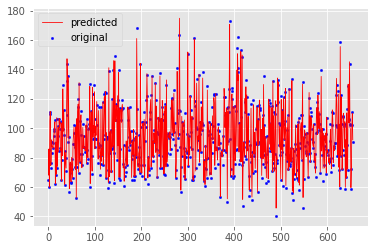

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# with new parameters
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# with default parameters
gbr = GradientBoostingRegressor()

gbr.fit(x_train, y_train)

y_pred = gbr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [71]:
#Actual value and the predicted value
gbr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
gbr_diff.head(10)

,Actual value,Predicted value
491,64.511040,68.165595
91,85.502297,85.892104
947,60.027739,59.906445
1377,109.736925,104.962226
1143,111.325881,111.564239
1283,72.943179,74.588722
2808,76.122920,77.759687
2028,90.925553,92.133882
2796,83.057967,87.514521
2320,89.766697,87.846876


In [72]:
res = gbr.predict([[6.5, 400, 2, 20]])[0]
print("WQI: ", res)

WQI:  40.06453604181509


In [73]:
from sklearn.metrics import mean_squared_error, r2_score

gbr_pred_train = gbr.predict(x_train)
gbr_pred_test = gbr.predict(x_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, gbr_pred_train)))
print("Training R2: ", r2_score(y_train, gbr_pred_train)*100)


print("Testing RMSE: ", np.sqrt(mean_squared_error(y_test, gbr_pred_test)))
print("Testing R2: ", r2_score(y_test, gbr_pred_test)*100)


Training RMSE:  1.5197970884138916
Training R2:  99.51837296849246
Testing RMSE:  2.325504605625277
Testing R2:  98.81950782365885


### As seen above, Gradient Boosting Regressor gives accuracy of 99.51%



## <mark><em>8. Gradient Boosting Classifier or GBC</em></mark>

* Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets, and have recently been used to win many Kaggle data science competitions.

In [74]:
#Setting the value for X and Y

x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.quality

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

#setting different learning rates, so that we can compare the performance of the classifier's performance at different learning rates.
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)), "\n")

Learning rate:  0.05
Accuracy score (training): 0.700
Accuracy score (validation): 0.649 

Learning rate:  0.075
Accuracy score (training): 0.756
Accuracy score (validation): 0.691 

Learning rate:  0.1
Accuracy score (training): 0.789
Accuracy score (validation): 0.724 

Learning rate:  0.25
Accuracy score (training): 0.861
Accuracy score (validation): 0.811 

Learning rate:  0.5
Accuracy score (training): 0.915
Accuracy score (validation): 0.858 

Learning rate:  0.75
Accuracy score (training): 0.937
Accuracy score (validation): 0.881 

Learning rate:  1
Accuracy score (training): 0.863
Accuracy score (validation): 0.806 



#### learning rate of 0.75 gives us the best performance on the validation set and good performance on the training set.


In [76]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(x_train, y_train)
y_pred = gb_clf2.predict(x_test)

In [77]:
gb_clf2.predict([[6.080795, 20791.31898, 2.963135, 29.3]])


array(['Poor'], dtype=object)

In [78]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)


Accuracy: 88.10975609756098


### As seen above, Gradient Boosting Classifier gives accuracy of 88%

